## Summary showing model prediction if person will take loan or not

In [1]:
# pip install pandas_profiling

In [2]:
# pip install ruamel_yaml==0.10.02

In [3]:
# pip install markupsafe==2.0.1

In [4]:
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv('data/loan_data.csv')
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

In [5]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0
...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0


In [6]:
#Coding qualitative variables
df.drop('SK_ID_CURR', axis=1, inplace=True)
df['NAME_CONTRACT_TYPE'] = df['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1})
# fill XNA with majority class (F)
df['CODE_GENDER'] = df['CODE_GENDER'].map({'F': 0, 'XNA': 0, 'M': 1})
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})
df.dropna(inplace=True)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [8]:
# pip install imblearn

In [9]:
# pip install sklearn

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('TARGET', axis=1),
                                                    df['TARGET'],
                                                    stratify=df['TARGET'],
                                                    random_state=42)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)


from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)
x_train, y_train = x_resampled, y_resampled

Get baseline accuracy for comparison.

In [11]:
df['TARGET'].value_counts() / df.shape[0]

0    0.919263
1    0.080737
Name: TARGET, dtype: float64

In [12]:
sk_lr = LogisticRegressionCV(max_iter=1000)
sk_lr.fit(x_train, y_train)
test_predictions = sk_lr.predict(x_test)
print(sk_lr.C_)
print(sk_lr.score(x_test, y_test))
display(confusion_matrix(y_test, test_predictions))
print(f1_score(y_test, test_predictions), accuracy_score(y_test, test_predictions))

[1291.54966501]
0.5504257479884384


array([[38510, 32095],
       [ 2435,  3766]])

0.17906899339070897 0.5504257479884384


In [13]:
import tkinter
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')

In [14]:
# pip install yellowbrick

CPU times: user 55.4 s, sys: 11.4 s, total: 1min 6s
Wall time: 11 s


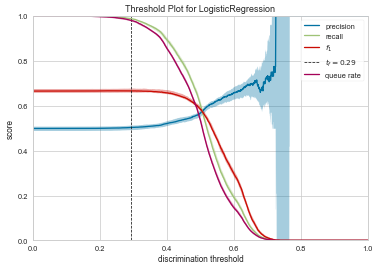

In [15]:
%%time
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.datasets import load_spam

# Load a binary classification dataset
n = -1
X, y = x_train[:n], y_train[:n]

# Instantiate the classification model and visualizer
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = DiscriminationThreshold(model)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure
plt.show()

In [16]:
test_predictions = sk_lr.predict_proba(x_test)[:, 1]
pred_ = np.where(test_predictions<=0.29, 0, 1)
display(confusion_matrix(y_test, pred_))
print(f1_score(y_test, pred_), accuracy_score(y_test, pred_))

array([[ 1831, 68774],
       [   64,  6137]])

0.15132162935200713 0.10374189516444028


In [17]:
sm_lr = sm.Logit(y_train, sm.add_constant(x_train))
sm_results = sm_lr.fit()
sm_results.summary()

Optimization terminated successfully.
         Current function value: 0.675993
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                37206
Model:                          Logit   Df Residuals:                    37196
Method:                           MLE   Df Model:                            9
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:                 0.02475
Time:                        13:07:54   Log-Likelihood:                -25151.
converged:                       True   LL-Null:                       -25789.
Covariance Type:            nonrobust   LLR p-value:                3.725e-269
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0630      0.011     -5.876      0.000      -0.084      -0.042
x1            -0.0980      0.012     -8.013      0.000      -0.122      -0.074
x2             0.2340      0.011     21.214      0.000       0.212       0.256
x3            -0.1528      0.012    -13.257      0.000      -0.175      -0.130
x4            -0.0243      0.011     -2.302      0.021      -0.045      -0.004
x5             0.0590      0.010      5.640      0.000       0.039       0.080
x6             0.0003      0.005      0.059      0.953      -0.009       0.009
x7             1.0324      0.069     15.042      0.000       0.898       1.167
x8             0.1141      0.018      6.320      0.000       0.079       0.149
x9            -1.2917      0.070    -18.359      0.000      -1.430      -1.154
==============================================================================
"""

In [18]:
test_predictions = np.where(sm_results.predict(sm.add_constant(x_test))<0.5, 0, 1)
display(confusion_matrix(y_test, test_predictions))
print(f1_score(y_test, test_predictions), accuracy_score(y_test, test_predictions))

array([[38515, 32090],
       [ 2436,  3765]])

0.17904698497241775 0.5504778272530791


It looks like the one variable we could throw out is the income column since it has such a larg p-value of 0.777. However, this is without regularization. Confusingly, with regularization, we find other columns have high p-values. For now we will keep all columns.

In [19]:
sm_lr = sm.Logit(y_train, sm.add_constant(x_train))
reg_res = sm_lr.fit_regularized()
reg_res.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6759930212716535
            Iterations: 36
            Function evaluations: 36
            Gradient evaluations: 36


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                37206
Model:                          Logit   Df Residuals:                    37196
Method:                           MLE   Df Model:                            9
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:                 0.02475
Time:                        13:07:54   Log-Likelihood:                -25151.
converged:                       True   LL-Null:                       -25789.
Covariance Type:            nonrobust   LLR p-value:                3.725e-269
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0630      0.011     -5.875      0.000      -0.084      -0.042
x1            -0.0980      0.012     -8.014      0.000      -0.122      -0.074
x2             0.2340      0.011     21.214      0.000       0.212       0.256
x3            -0.1528      0.012    -13.257      0.000      -0.175      -0.130
x4            -0.0243      0.011     -2.302      0.021      -0.045      -0.004
x5             0.0590      0.010      5.639      0.000       0.039       0.080
x6             0.0003      0.005      0.059      0.953      -0.009       0.009
x7             1.0324      0.069     15.041      0.000       0.898       1.167
x8             0.1141      0.018      6.320      0.000       0.079       0.149
x9            -1.2916      0.070    -18.358      0.000      -1.430      -1.154
==============================================================================
"""

In [20]:
test_predictions = np.where(sm_results.predict(sm.add_constant(x_test))<0.5, 0, 1)
display(confusion_matrix(y_test, test_predictions))
print(f1_score(y_test, test_predictions), accuracy_score(y_test, test_predictions))

array([[38515, 32090],
       [ 2436,  3765]])

0.17904698497241775 0.5504778272530791


In [21]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(x_train, y_train)
test_predictions = knn.predict(x_test)
print(knn.score(x_test, y_test))

0.5600083326823425


In [22]:
# test_predictions = np.where(sm_results.predict(sm.add_constant(x_test)).values<0.15, 0, 1)
display(confusion_matrix(y_test, test_predictions))
print(f1_score(y_test, test_predictions), accuracy_score(y_test, test_predictions))

array([[39606, 30999],
       [ 2795,  3406]])

0.1677584593409841 0.5600083326823425


In [23]:
ss = StandardScaler()
x_tr_sc = ss.fit_transform(x_train)
x_te_sc = ss.transform(x_test)

knn_sc = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_sc.fit(x_tr_sc, y_train)
test_predictions = knn_sc.predict(x_te_sc)
print(knn.score(x_te_sc, y_test))

0.5722339400567664


In [24]:
display(confusion_matrix(y_test, test_predictions))
print(f1_score(y_test, test_predictions), accuracy_score(y_test, test_predictions))

array([[40435, 30170],
       [ 2834,  3367]])

0.16945996275605216 0.5702939874488973


In [25]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
test_predictions = gnb.predict(x_test)
print(gnb.score(x_test, y_test))

0.7295002994557717


In [26]:
display(confusion_matrix(y_test, test_predictions))
print(f1_score(y_test, test_predictions), accuracy_score(y_test, test_predictions))

array([[54557, 16048],
       [ 4728,  1473]])

0.12418851698844956 0.7295002994557717


In [27]:
## To continue 
# 1. scale from sklearn.preprocessing import StandardScaler
# 2. undersample from imblearn.under_sampling import RandomUnderSampler
# 3. oversample from imblearn.over_sampling import RandomOverSampler
# 4. smot from imblearn.over_sampling import KMeansSMOTE

In [28]:
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(df.drop('TARGET', axis=1),
                                                    df['TARGET'],
                                                    stratify=df['TARGET'],
                                                    random_state=42)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

# x_train, y_train = x_resampled, y_resampled

In [29]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)

In [30]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 18603, 1: 18603})


In [31]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=1)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)
x_train, y_train = x_resampled, y_resampled

In [32]:
from imblearn.over_sampling import KMeansSMOTE

kmSMOTE = KMeansSMOTE(k_neighbors=5,
                      cluster_balance_threshold=0.1,
                      random_state=42,
                      n_jobs=-1)
x_resampled, y_resampled = kmSMOTE.fit_resample(x_train, y_train)
x_train, y_train = x_resampled, y_resampled